#### Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

#### Requirements
#### 1. Create an exploratory data analysis notebook.
#### 2. Perform statistical analysis, along with any visualizations.
#### 3. Determine how to handle sampling or missing values.
#### 4. Clearly identify shortcomings, assumptions, and next steps.

#### Submission
#### Submit or share your project brief as per your instructor's directions.

In [2]:
import pandas as pd

In [3]:
apps = pd.read_csv('2017 Apps Data Mac.csv')

In [4]:
apps.head()

,Absolute_Downloads,Change_Downloads,Change Ratio_Downloads,Absolute_Revenue,Change_Revenue,Change_Ratio_Revenue,Category,In_App_Purchases,Contains_Ads,Changed_Free_to_Paid,Free
0,987448579,85637970,0.094962,92960.32,-129074.72,-0.581326,Communication,False,False,False,True
1,843974561,44444656,0.055588,123185.80,123185.80,0.000000,Communication,False,False,NaN,True
2,750298558,-90192790,-0.107310,15.37,15.37,0.000000,Social,False,True,False,True
3,467443697,49465262,0.118344,0.00,0.00,0.000000,Social,False,True,False,True
4,278450963,82599265,0.421744,0.00,0.00,0.000000,Tools,False,True,False,True


In [5]:
print('Rows: {}, Cols: {}'.format(apps.shape[0], apps.shape[1]))

Rows: 1500, Cols: 11


In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
Absolute_Downloads        1500 non-null int64
Change_Downloads          1500 non-null int64
Change Ratio_Downloads    1500 non-null float64
Absolute_Revenue          1500 non-null float64
Change_Revenue            1500 non-null float64
Change_Ratio_Revenue      1500 non-null float64
Category                  1500 non-null object
In_App_Purchases          1500 non-null bool
Contains_Ads              1393 non-null object
Changed_Free_to_Paid      1005 non-null object
Free                      1500 non-null bool
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 108.5+ KB


In [7]:
print('Null values by column: ')
print(pd.isnull(apps).sum())

Null values by column: 
Absolute_Downloads          0
Change_Downloads            0
Change Ratio_Downloads      0
Absolute_Revenue            0
Change_Revenue              0
Change_Ratio_Revenue        0
Category                    0
In_App_Purchases            0
Contains_Ads              107
Changed_Free_to_Paid      495
Free                        0
dtype: int64


### The null values in contains ads and changed_free_to_paid columns represent that the app does not contain ads or that it did not switch from free to paid. Potential thing I could do later is to assign the null values to a value, such as "No" or a number that represents that.

In [8]:
print('Basic summary statistics: ')
print(apps.describe())

Basic summary statistics: 
       Absolute_Downloads  Change_Downloads  Change Ratio_Downloads  \
count        1.500000e+03      1.500000e+03            1.500000e+03   
mean         2.359635e+07      3.160248e+06            9.878321e+03   
std          4.691825e+07      1.785817e+07            3.525637e+05   
min          7.281799e+06     -3.148791e+08           -8.597582e-01   
25%          9.248641e+06     -2.332579e+06           -1.377532e-01   
50%          1.271425e+07      2.809348e+06            4.306485e-02   
75%          2.252714e+07      8.982797e+06            6.844176e-01   
max          9.874486e+08      9.726814e+07            1.361156e+07   

       Absolute_Revenue  Change_Revenue  Change_Ratio_Revenue  
count      1.500000e+03    1.500000e+03          1.500000e+03  
mean       1.130294e+07    3.589660e+06          1.074961e+03  
std        5.540067e+07    3.119222e+07          3.506492e+04  
min        0.000000e+00   -2.369632e+08         -1.000000e+00  
25%        0.

In [9]:
ax = apps.plot(kind='box', figsize=(15, 6), title = 'Distribution of Columns')

I need to determine if there are any apps that switched from free to paid during 2017, but are now back to being free. 

In [10]:
apps.loc[:,'Category'].value_counts()

Action                     120
Tools                      116
Arcade                      90
Casual                      86
Photography                 80
Entertainment               80
Racing                      74
Music & Audio               60
Puzzle                      57
Simulation                  55
Shopping                    54
Productivity                51
Sports                      49
Social                      46
Communication               45
Finance                     35
Strategy                    32
Video Players & Editors     30
Travel & Local              29
Role Playing                27
Personalization             26
Health & Fitness            23
Adventure                   20
Lifestyle                   17
Education                   15
Business                    14
News & Magazines            13
Maps & Navigation           13
Board                       13
Utilities                   12
Books & Reference           11
Music                       11
Food & D

Depending on what analysis I run, I may not be able to get statistically significant results for some of these categories. The data is too spare

In [12]:
apps.groupby('Category')['Absolute_Revenue'].mean()

Category
Action                     1.807045e+07
Adventure                  3.040346e+07
Arcade                     1.270065e+06
Art & Design               0.000000e+00
Auto & Vehicles            0.000000e+00
Board                      9.133777e+06
Books                      2.269720e+07
Books & Reference          2.419886e+06
Business                   5.547032e+05
Card                       2.845026e+07
Casino                     6.827524e+07
Casual                     2.269643e+07
Comics                     0.000000e+00
Communication              7.568467e+06
Dating                     7.468238e+05
Education                  2.441339e+06
Educational                1.886530e+05
Entertainment              1.153482e+07
Finance                    4.384000e+00
Food & Drink               0.000000e+00
Games                      4.892144e+07
Health & Fitness           5.318361e+06
House & Home               2.652426e+04
Libraries & Demo           0.000000e+00
Lifestyle                  2.10

In [13]:
apps.groupby('Category')['Absolute_Downloads'].mean()

Category
Action                     2.049521e+07
Adventure                  1.796236e+07
Arcade                     2.316854e+07
Art & Design               9.422337e+06
Auto & Vehicles            7.841656e+06
Board                      2.218910e+07
Books                      1.468663e+07
Books & Reference          1.778469e+07
Business                   1.294246e+07
Card                       1.803040e+07
Casino                     1.213804e+07
Casual                     2.103987e+07
Comics                     1.374106e+07
Communication              8.198324e+07
Dating                     1.137842e+07
Education                  1.471432e+07
Educational                1.231607e+07
Entertainment              2.583935e+07
Finance                    1.464768e+07
Food & Drink               1.433878e+07
Games                      1.466929e+07
Health & Fitness           1.191836e+07
House & Home               1.233285e+07
Libraries & Demo           8.190985e+06
Lifestyle                  1.82

In [15]:
apps.groupby(['Category', 'In_App_Purchases'])['Absolute_Revenue'].mean()

Category                 In_App_Purchases
Action                   False               4.756038e+07
                         True                1.107799e+07
Adventure                False               0.000000e+00
                         True                3.800432e+07
Arcade                   False               4.254450e+05
                         True                1.438989e+06
Art & Design             False               0.000000e+00
Auto & Vehicles          False               0.000000e+00
Board                    False               2.719642e+07
                         True                3.714984e+06
Books                    True                2.269720e+07
Books & Reference        False               0.000000e+00
                         True                5.323749e+06
Business                 False               1.874601e+05
                         True                1.215741e+06
Card                     False               0.000000e+00
                         True 

In [16]:
apps.groupby('Contains_Ads')['Absolute_Revenue'].mean()

Contains_Ads
False    2.629472e+07
True     6.037830e+06
Name: Absolute_Revenue, dtype: float64

In [17]:
apps.groupby('Free')['Absolute_Revenue'].mean()

Free
False    2.117565e+05
True     1.131774e+07
Name: Absolute_Revenue, dtype: float64

In [18]:
apps.groupby(['Free', 'Contains_Ads'])['Absolute_Revenue'].mean()

Free  Contains_Ads
True  False           2.629472e+07
      True            6.037830e+06
Name: Absolute_Revenue, dtype: float64

In [19]:
apps.groupby('Contains_Ads')['Absolute_Revenue'].agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
Contains_Ads,,,,
True,1015,6.037830e+06,0.0,3.814998e+08
False,378,2.629472e+07,0.0,1.092927e+09


Text(0.5,1,'Number of Apps That Are Free vs. Paid')

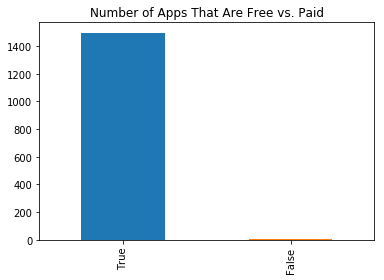

In [40]:
ax = apps.loc[:, 'Free'].value_counts().plot(kind='bar')
ax.set_title('Number of Apps That Are Free vs. Paid')

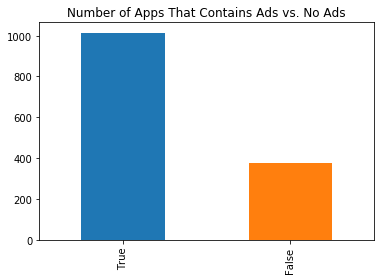

In [42]:
ax = apps.loc[:, 'Contains_Ads'].value_counts().plot(kind='bar')
ax.set_title('Number of Apps That Contains Ads vs. No Ads');

In [59]:
first_five = apps.loc[:4, 'Absolute_Revenue']
first_five

0     92960.32
1    123185.80
2        15.37
3         0.00
4         0.00
Name: Absolute_Revenue, dtype: float64

In [61]:
mean = first_five.mean()

In [63]:
import numpy as np

In [64]:
variance = (np.square(92960.32-mean)+np.square(12185.8-mean)+np.square(15.37-mean)+np.square(0-mean)+np.square(0-mean)) / 4

In [65]:
variance

2260631814.14382

this is a huge concern. i may need to work on this data within categories

In [67]:
print(first_five.std())

60148.16019749748


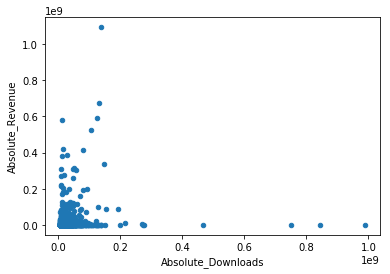

In [68]:
ax3 = apps.plot(x='Absolute_Downloads', y='Absolute_Revenue', kind = 'scatter')

seems to skew right but for the most part, the revenue goes up steeply with an increase in downloads.

The data is very thorough. I am not missing any data other than null values in several columns, but even those mean something. I anticipate no data clean up work will be required.

One large risk that lies in my data set is the selection bias. I don't think there is a way to eliminate this in my analysis. It's inherent to the way the apps store apps survive. 1,500 apps are likely amid the top few percentile of apps, which means they have all gained fair traction, survived and generated enough downloads and revenue to be on SensorTower, the data provider's radar.

Here are some things I need to address in the next steps:
1. Find the correlation between downloads and revenue. Depending on the outcome, if they are highly correlated, I would need to remove or not use "Downloads' to predict revenue to avoid multicollinearity
2. Figure out which app category has enough app data to sample from.
3. Find out which of the following three variables, Free/Paid, Advertising, in-app purchases, are significant determinators, and figure out which one to ultimatley keep.
4. the end goal is to come up with a loop/decision-tree type format that would train each model against data set within a given category. ultimately, the model should be able to (1) detect the category then (2) test it against the right version.